In [2]:
!pip install xgboost

In [3]:
# Import our dependencies
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import pandas as pd
import tensorflow as tf
import numpy as np

#models
from xgboost import XGBRegressor

#  Import and read the charity_data.csv.
import pandas as pd

# Get data from Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Prepare Data

In [4]:
df_raw = pd.read_csv('/content/drive/My Drive/Colab Notebooks/energy_weather_joined.csv')
df_raw.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 05:00:00+01:00,410.0,178.0,0.0,4038.0,3590.0,156.0,0.0,0.0,0.0,...,2,321,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 07:00:00+01:00,408.0,172.0,0.0,4030.0,3208.0,160.0,0.0,0.0,0.0,...,2,321,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 11:00:00+01:00,421.0,226.0,0.0,3931.0,3845.0,166.0,0.0,0.0,0.0,...,1,255,0.0,0.0,0.0,0,800,clear,sky is clear,01d


In [5]:
# get the columns name as reference for below
df_raw.columns

Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage aggregated',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind offshore eday ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual', 'city_name', 'temp', 'temp_min', 'temp_max', 'pressure',
       'humidity', 'wind_speed',

In [6]:
df=df_raw.drop(["generation marine", "generation wind offshore", "forecast solar day ahead", "forecast wind onshore day ahead", "forecast wind onshore day ahead", "forecast wind offshore eday ahead", "total load forecast", "price day ahead", "generation hydro pumped storage aggregated"], axis=1)

In [7]:
df.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 05:00:00+01:00,410.0,178.0,0.0,4038.0,3590.0,156.0,0.0,0.0,0.0,...,2,321,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 07:00:00+01:00,408.0,172.0,0.0,4030.0,3208.0,160.0,0.0,0.0,0.0,...,2,321,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 11:00:00+01:00,421.0,226.0,0.0,3931.0,3845.0,166.0,0.0,0.0,0.0,...,1,255,0.0,0.0,0.0,0,800,clear,sky is clear,01d


In [8]:
df=df.drop(["weather_id", "weather_icon", "weather_description", "weather_main", "temp_min", "city_name", "temp_max"], axis=1)
df.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,price actual,temp,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,65.41,270.475,1001,77,1,62,0.0,0.0,0.0,0
1,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,56.04,269.686,1002,78,0,23,0.0,0.0,0.0,0
2,2015-01-01 05:00:00+01:00,410.0,178.0,0.0,4038.0,3590.0,156.0,0.0,0.0,0.0,...,53.63,270.292,1004,71,2,321,0.0,0.0,0.0,0
3,2015-01-01 07:00:00+01:00,408.0,172.0,0.0,4030.0,3208.0,160.0,0.0,0.0,0.0,...,51.43,270.292,1004,71,2,321,0.0,0.0,0.0,0
4,2015-01-01 11:00:00+01:00,421.0,226.0,0.0,3931.0,3845.0,166.0,0.0,0.0,0.0,...,59.86,284.824,1006,55,1,255,0.0,0.0,0.0,0


In [9]:
#split time (datetime format) column into date and time
datetimezone = df['time'].astype("string")
datelist = []
timelist = []

for datetimerow in datetimezone:
    date, time = datetimerow.split(" ", 1)
    time, timezone = time.split("+", 1)
    datelist.append(date)
    timelist.append(time)

In [10]:
monthlist = []
daylist = []

for date in datelist:
  year, yearless = date.split("-", 1)
  month, day = yearless.split("-", 1)
  daylist.append(day)
  monthlist.append(month)

df['day'] = daylist
df['month'] = monthlist

In [11]:
hourlist = []

for time in timelist:
  hour, hourless = time.split(":", 1)
  hourlist.append(hour)

df['hour'] = hourlist

In [12]:
df=df.drop(["time"], axis=1)

In [13]:
df['month'] = df['month'].astype('int')
df['day'] = df['day'].astype('int')
df['hour'] = df['hour'].astype('int')

In [14]:
df.isnull().sum()

generation biomass                              95
generation fossil brown coal/lignite            90
generation fossil coal-derived gas              90
generation fossil gas                           90
generation fossil hard coal                     90
generation fossil oil                           95
generation fossil oil shale                     90
generation fossil peat                          90
generation geothermal                           90
generation hydro pumped storage consumption     95
generation hydro run-of-river and poundage      95
generation hydro water reservoir                90
generation nuclear                              85
generation other                                90
generation other renewable                      90
generation solar                                90
generation waste                                95
generation wind onshore                         90
total load actual                              180
price actual                   

In [15]:
df_nonulls = df.dropna()

# Scaling the Data using StandardScaler()

In [16]:
x_nonulls = df_nonulls.loc[:,df_nonulls.columns != "price actual"]
x = df.loc[:,df.columns != "price actual"]
x_columns = df_nonulls.loc[:,df_nonulls.columns != "price actual"].columns

#scale the data
x_scaled_nonulls = StandardScaler().fit_transform(x_nonulls)
x_scaled = StandardScaler().fit_transform(x)

In [17]:
x_scaled_nonulls

array([[ 0.75095568, -0.33672275,  0.        , ..., -1.67345975,
        -1.59745252, -1.66299088],
       [ 0.52796893, -0.73747298,  0.        , ..., -1.67345975,
        -1.59745252, -1.08412984],
       [ 0.31671833, -0.76287264,  0.        , ..., -1.67345975,
        -1.59745252, -0.93941458],
       ...,
       [-1.02120213, -1.26522152,  0.        , ...,  1.73416348,
         1.58140436,  1.23131434],
       [-1.05641057, -1.26522152,  0.        , ...,  1.73416348,
         1.58140436,  1.52074486],
       [-1.091619  , -1.26522152,  0.        , ...,  1.73416348,
         1.58140436,  1.66546012]])

In [18]:
df_scaled_nonulls = pd.DataFrame(x_scaled_nonulls, columns=x_columns)
df_scaled = pd.DataFrame(x_scaled, columns=x_columns)

In [19]:
df_scaled_nonulls

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage consumption,...,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,day,month,hour
0,0.750956,-0.336723,0.0,-0.354804,0.289325,-2.597814,0.0,0.0,0.0,0.489248,...,0.391614,-0.701570,-0.896565,-0.189079,-0.052067,-0.021232,-0.814785,-1.673460,-1.597453,-1.662991
1,0.527969,-0.737473,0.0,-0.678746,-0.211007,-2.712286,0.0,0.0,0.0,1.704338,...,0.437268,-1.178646,-1.231001,-0.189079,-0.052067,-0.021232,-0.814785,-1.673460,-1.597453,-1.084130
2,0.316718,-0.762873,0.0,-0.720487,-0.338513,-2.712286,0.0,0.0,0.0,2.061420,...,0.117690,-0.224494,1.324432,-0.189079,-0.052067,-0.021232,-0.814785,-1.673460,-1.597453,-0.939415
3,0.293246,-0.779806,0.0,-0.724117,-0.533341,-2.635971,0.0,0.0,0.0,1.963002,...,0.117690,-0.224494,1.324432,-0.189079,-0.052067,-0.021232,-0.814785,-1.673460,-1.597453,-0.649984
4,0.445816,-0.627408,0.0,-0.769033,-0.208457,-2.521499,0.0,0.0,0.0,0.893016,...,-0.612772,-0.701570,0.758464,-0.189079,-0.052067,-0.021232,-0.814785,-1.673460,-1.597453,-0.071123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178161,-1.009466,-1.265222,0.0,0.247258,-0.769481,-1.643876,0.0,0.0,0.0,-0.578213,...,-0.475811,0.252583,-0.913716,-0.189079,-0.052067,-0.021232,-0.814785,1.734163,1.581404,0.218308
178162,-1.032938,-1.265222,0.0,0.227749,-0.893927,-2.292554,0.0,0.0,0.0,-0.171922,...,-0.795388,1.206735,-1.085222,-0.189079,-0.052067,-0.021232,-0.814785,1.734163,1.581404,0.507738
178163,-1.021202,-1.265222,0.0,0.732718,-0.860775,-2.368869,0.0,0.0,0.0,-0.598402,...,-0.293195,0.252583,-1.170974,-0.189079,-0.052067,-0.021232,-0.814785,1.734163,1.581404,1.231314
178164,-1.056411,-1.265222,0.0,0.424655,-1.000011,-2.578735,0.0,0.0,0.0,-0.463392,...,-0.521465,0.729659,-0.913716,-0.189079,-0.052067,-0.021232,-0.814785,1.734163,1.581404,1.520745


# Machine Learning Regression model

In [20]:
# Convert categorical data to numeric with `pd.get_dummies`
dummies = pd.get_dummies(df_scaled_nonulls.loc[:,df_scaled_nonulls.columns != "price actual"])

In [21]:
# Split our preprocessed data into our features and target arrays
y = df_nonulls["price actual"].values
#X = application_df.drop(["IS_SUCCESSFUL"],axis=1).values
X = dummies
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [22]:
model = XGBRegressor()

In [23]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [24]:
score = model.score(X_train, y_train)
print(f"score: {score}")

score: 0.9402615709790575


In [25]:
pred_price = model.predict(X_test)
# summarize prediction
#average = sum(prediction)/len(prediction)

#predicted price
print('Predicted price: %.3f euros per megawatts-hour' % pred_price[0])

Predicted price: 42.250 euros per megawatts-hour


# Test Model

In [26]:
analyze_df = X_test.copy()
analyze_df["predicted Price"] = pred_price

In [27]:
analyze_df['y_test'] = y_test

In [28]:
analyze_df.head()

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage consumption,...,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,day,month,hour,predicted Price,y_test
120845,-1.279397,-1.265222,0.0,-0.691450,-1.589597,0.988993,0.0,0.0,0.0,0.123334,...,0.629834,2.068774,-0.052067,-0.021232,0.485216,-0.083236,-1.019479,0.652453,42.249985,41.79
39068,0.891789,-0.274635,0.0,-0.673302,-0.079421,-0.518229,0.0,0.0,0.0,1.622322,...,0.887093,-0.189079,0.907950,-0.021232,1.622717,0.711877,1.003430,-1.084130,46.938972,48.74
41258,-1.784052,-1.265222,0.0,-0.218693,-1.435060,-0.594544,0.0,0.0,0.0,-0.378853,...,-1.428233,-0.189079,-0.052067,-0.021232,0.485216,0.711877,-0.730492,1.665460,40.534798,40.27
119465,-1.936621,0.357535,0.0,-0.130675,-0.365034,0.149528,0.0,0.0,0.0,-0.590831,...,-1.428233,-0.189079,-0.052067,-0.021232,-0.814785,-1.332697,1.581404,0.363023,81.978363,82.89
129531,1.419916,-0.350834,0.0,0.621108,0.529545,1.675828,0.0,0.0,0.0,-0.258984,...,0.629834,-0.189079,-0.052067,-0.021232,-0.814785,0.143939,-1.308466,1.086599,57.785847,59.66


In [29]:
hour_price_pred = analyze_df.groupby('hour')['predicted Price'].mean()
hour_price_pred

hour
-1.662991    55.828621
-1.518276    51.957729
-1.373560    49.101044
-1.228845    48.242638
-1.084130    48.026272
-0.939415    48.159000
-0.794699    52.242943
-0.649984    56.551117
-0.505269    60.440845
-0.360554    61.258648
-0.215838    62.522610
-0.071123    61.536453
 0.073592    61.932602
 0.218308    61.498280
 0.363023    59.978779
 0.507738    57.537525
 0.652453    57.341339
 0.797169    58.238773
 0.941884    62.534264
 1.086599    64.198456
 1.231314    65.057014
 1.376030    65.414902
 1.520745    62.527367
 1.665460    58.561192
Name: predicted Price, dtype: float32

In [30]:
hour_price_act = analyze_df.groupby('hour')['y_test'].mean()
hour_price_act

hour
-1.662991    55.853681
-1.518276    52.093069
-1.373560    49.122558
-1.228845    48.242828
-1.084130    47.743220
-0.939415    48.165341
-0.794699    52.344940
-0.649984    56.332904
-0.505269    60.594617
-0.360554    61.312018
-0.215838    62.650990
-0.071123    61.739190
 0.073592    62.115541
 0.218308    61.697136
 0.363023    59.957083
 0.507738    57.343822
 0.652453    57.182413
 0.797169    58.180560
 0.941884    62.600563
 1.086599    64.074357
 1.231314    64.930936
 1.376030    65.694937
 1.520745    62.450172
 1.665460    58.358810
Name: y_test, dtype: float64

In [31]:
hour_price_act - hour_price_pred

hour
-1.662991    0.025060
-1.518276    0.135340
-1.373560    0.021514
-1.228845    0.000191
-1.084130   -0.283052
-0.939415    0.006340
-0.794699    0.101997
-0.649984   -0.218213
-0.505269    0.153772
-0.360554    0.053370
-0.215838    0.128380
-0.071123    0.202737
 0.073592    0.182939
 0.218308    0.198857
 0.363023   -0.021696
 0.507738   -0.193703
 0.652453   -0.158926
 0.797169   -0.058214
 0.941884    0.066300
 1.086599   -0.124099
 1.231314   -0.126078
 1.376030    0.280035
 1.520745   -0.077194
 1.665460   -0.202382
dtype: float64

# Important Features

Used source as aid: https://www.rasgoml.com/feature-engineering-tutorials/how-to-generate-feature-importance-plots-using-xgboost

Text(0.5, 1.0, 'Feature Importance of Pricing')

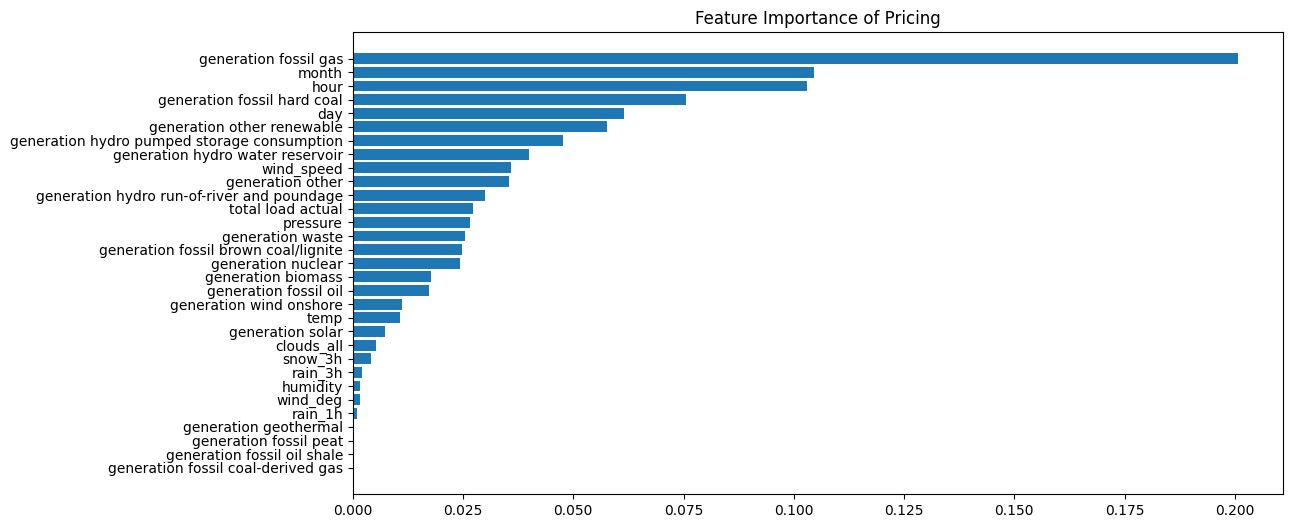

In [32]:
#get important features
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)

#create graph
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance of Pricing')

# Optimization

In [33]:
# Convert categorical data to numeric with `pd.get_dummies` just in case
dummies_new = pd.get_dummies(df.loc[:,df.columns != "price actual"])

In [34]:
# Split our preprocessed data into our features and target arrays
y_new = df["price actual"].values
#X = application_df.drop(["IS_SUCCESSFUL"],axis=1).values
X_new = dummies_new
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.15)

In [35]:
model_new = XGBRegressor()

In [36]:
model_new.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [37]:
score_new = model_new.score(X_train, y_train)
print(f"score: {score_new}")
print(f"improved by: {score_new - score}")

score: 0.9384193280871376
improved by: -0.0018422428919199207


# Add-Ons for Demo Day

### make machine learning model to predict the consumption of renewable and nonrenewable energy using price and weather as parameters

y values = consumption of renewable and nonrenewable energy (in kWh)

x values = weather, price, etc. (the remaining columns)

In [38]:
df_demo = df.copy()

In [39]:
df_demo.columns

Index(['generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore', 'total load actual',
       'price actual', 'temp', 'pressure', 'humidity', 'wind_speed',
       'wind_deg', 'rain_1h', 'rain_3h', 'snow_3h', 'clouds_all', 'day',
       'month', 'hour'],
      dtype='object')

In [40]:
#get column list to divide the type of energy
nonrenewable = ['generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation nuclear', 'generation other',]
renewable = ['generation biomass',
       'generation geothermal', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore',]

In [41]:
#prepare data part

df_demo['nonrenewable SUM'] = df_demo[nonrenewable].sum(axis=1)
df_demo['renewable SUM'] = df_demo[renewable].sum(axis=1)


In [42]:
#remove the individual energy consumption, not needed
df_demo = df_demo.drop(nonrenewable, axis=1)
df_demo = df_demo.drop(renewable, axis=1)

In [43]:
# drop this because there are columns are were excluded and differ to the sums above
# df.drop(['total load actual'], axis=1)

In [44]:
#check the data
df_demo.head()

,total load actual,price actual,temp,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,day,month,hour,nonrenewable SUM,renewable SUM
0,25385.0,65.41,270.475,1001,77,1,62,0.0,0.0,0.0,0,1,1,0,17295.0,10956.0
1,20264.0,56.04,269.686,1002,78,0,23,0.0,0.0,0.0,0,1,1,4,15453.0,9167.0
2,19905.0,53.63,270.292,1004,71,2,321,0.0,0.0,0.0,0,1,1,5,15103.0,9128.0
3,20377.0,51.43,270.292,1004,71,2,321,0.0,0.0,0.0,0,1,1,7,14712.0,8722.0
4,23547.0,59.86,284.824,1006,55,1,255,0.0,0.0,0.0,0,1,1,11,15307.0,10436.0


In [58]:
#Machine learning part
# Split our preprocessed data into our features and target arrays
y_demo = df_demo[["nonrenewable SUM","renewable SUM"]].values
#X = application_df.drop(["IS_SUCCESSFUL"],axis=1).values
X_demo = df_demo.loc[:,(df_demo.columns != "nonrenewable SUM") & (df_demo.columns != "renewable SUM")]
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X_demo, y_demo, test_size=0.15)

In [46]:
model_demo = XGBRegressor()

In [47]:
model_demo.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [48]:
score_demo = model_demo.score(X_train, y_train)
print(f"score: {score_demo}")

score: 0.8283519090068749


Text(0.5, 1.0, 'Feature Importance of Pricing')

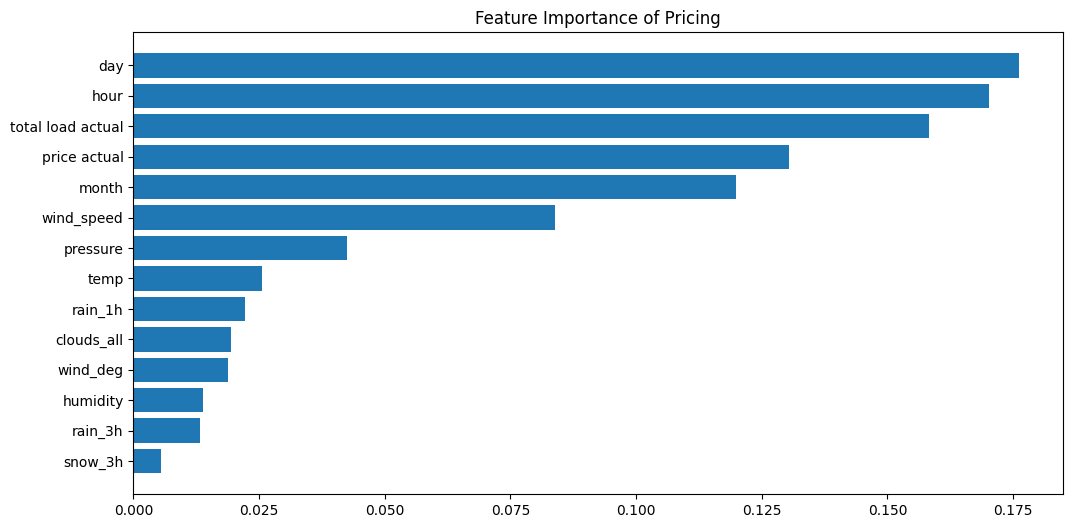

In [49]:
#get important features for this model
feature_importance = model_demo.feature_importances_
sorted_idx = np.argsort(feature_importance)

#create graph
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance of Pricing')

In [134]:
X_demo.head(26)

,total load actual,price actual,temp,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,day,month,hour
0,25385.0,65.41,270.475000,1001,77,1,62,0.0,0.0,0.0,0,1,1,0
1,20264.0,56.04,269.686000,1002,78,0,23,0.0,0.0,0.0,0,1,1,4
2,19905.0,53.63,270.292000,1004,71,2,321,0.0,0.0,0.0,0,1,1,5
3,20377.0,51.43,270.292000,1004,71,2,321,0.0,0.0,0.0,0,1,1,7
4,23547.0,59.86,284.824000,1006,55,1,255,0.0,0.0,0.0,0,1,1,11
5,24133.0,60.12,284.824000,1006,55,1,255,0.0,0.0,0.0,0,1,1,12
6,24713.0,62.05,284.824000,1006,55,1,255,0.0,0.0,0.0,0,1,1,13
7,24672.0,62.06,285.050656,1015,52,1,248,0.0,0.0,0.0,0,1,1,14
8,23528.0,59.76,285.277344,1025,50,1,242,0.0,0.0,0.0,0,1,1,15
9,23606.0,64.74,282.744000,1035,58,1,226,0.0,0.0,0.0,0,1,1,17


In [138]:
# get x value - hour for test
x_actual = X_demo.head(13).copy()
x_hour = x_actual["hour"]

# get y values, extract the energy type groups
y_actual = y_demo[:13].copy()
y_nonre = []
y_renew = []

for nonre, renew in y_actual:
  y_nonre.append(nonre)
  y_renew.append(renew)

In [139]:
#prepare for graph
y_model = model_demo.predict(X_demo)

# extract the energy type groups
y_model_nonre = []
y_model_renew = []

# use for loop to extract
for nonre, renew in y_model[:13]:
  y_model_nonre.append(nonre)
  y_model_renew.append(renew)

#print(len(x_model_hour))

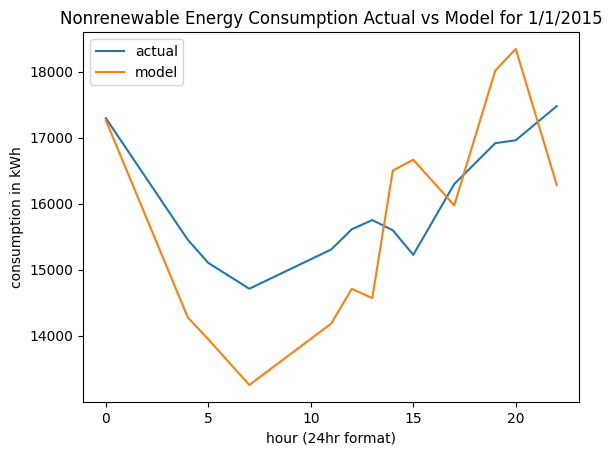

In [144]:
#graph the prediction and actual for comparison
plt.plot(x_hour, y_nonre, label = "actual")
plt.plot(x_hour, y_model_nonre, label = "model")
plt.title("Nonrenewable Energy Consumption Actual vs Model for 1/1/2015")
plt.ylabel("consumption in kWh")
plt.xlabel("hour (24hr format)")
plt.legend()
plt.show()

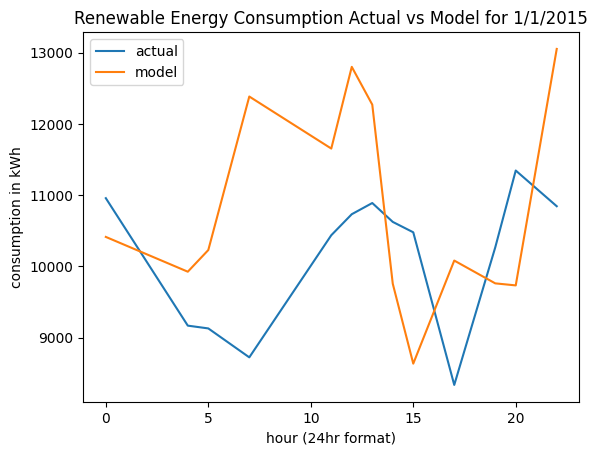

In [145]:
#graph the prediction and actual for comparison
plt.plot(x_hour, y_renew, label = "actual")
plt.plot(x_hour, y_model_renew, label = "model")
plt.title("Renewable Energy Consumption Actual vs Model for 1/1/2015")
plt.ylabel("consumption in kWh")
plt.xlabel("hour (24hr format)")
plt.legend()
plt.show()

In [147]:
#prepare data for download
model_data = df_demo.copy()

nonre_full = []
renew_full = []

for nonre, renew in y_model:
  nonre_full.append(nonre)
  renew_full.append(renew)

model_data["forecast nonrenewable"] = nonre_full
model_data["forecast renewable"] = renew_full

In [148]:
#save model forecast date
model_data.to_csv('forecastData.csv')